# Final Project: 
## Credit Card Defaults Dataset

### Names: Ozair Khan
### Student ID: 200143300


### Introduction:
The credit card defaults dataset is a collection of data from credit card clients in Taiwan ranging from April 2005 to September 2005. The dataset includes information on default payments, client demographics, bill statements as well as payment history.  

### Motivation and Question:
As a Customer Experierence Associate at TD Bank, I sometimes interact with customers who have trouble paying off their credit cards. I often wonder **what underlying factors seperate customers who are able to pay off their debts versus those who struggle to do so**. In this project I will explore the factors involved in credit card defaults through the lense of a credit analyst named "Joe". 

In [2]:
# Imports
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('dataset.csv')
# Link: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

### Data Preprocessing:
Joe starts off his day at the office where his manager assigns him to analyze this dataset. He will begin this process by preprocessing the dataset into a format that is more suitable for analysis and modeling. Below Joe can see the following dataset attributes (description references from kaggle dataset). <br>

**Customer Demographic Information:**
1. ID - Customer ID 
2. LIMIT_BAL - Amount of given credit in NT dollars (may include additional credit as well from family or others)
3. SEX - (1= male, 2 = female)
4. EDUCATION - (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. Marriage - (1=married, 2=single, 3=others)
6. AGE

**Payment Delay:** 
(-1=payed on time, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above):
1. PAY_0 - Payment status in September, 2005 
2. PAY_2 - Payment status in August, 2005 
3. PAY_3 - Payment status in July, 2005
4. PAY_4 - Payment status in June, 2005
5. PAY_5 - Payment status in May, 2005
6. PAY_6 - Payment status in April, 2005

**Bill Statment History:**
In New Taiwan Dollars. For reference 1 CAD = $22.57 NT based on today's exchange rate.
1. BILL_AMT1 - Amount of bill statement in September, 2005
2. BILL_AMT2 - Amount of bill statement in August, 2005 
3. BILL_AMT3 - Amount of bill statement in July, 2005 
4. BILL_AMT4 - Amount of bill statement in June, 2005
5. BILL_AMT5 - Amount of bill statement in May, 2005
6. BILL_AMT6 - Amount of bill statement in April, 2005

**Previous Payment History:**
In New Taiwan Dollars.
1. PAY_AMT1 - Amount of previous payment in September, 2005
2. PAY_AMT2 - Amount of previous payment in August, 2005
3. PAY_AMT3 - Amount of previous payment in July, 2005
4. PAY_AMT4 - Amount of previous payment in June, 2005
5. PAY_AMT5 - Amount of previous payment in May, 2005
6. PAY_AMT6 - Amount of previous payment in April, 2005

**Other:**<br>
1. default.payment.next.month: Default payment (1=yes, 0=no)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Joe does the following preprocessing
1. Renames column
2. Reassign column values to actual description

In [4]:
df.columns = ["Customer_ID", "Credit_Limit", "Sex", "Education_Level", "Marriage_Status", "Age", 
              "Pymt_Status_Sep", "Pymt_Status_Aug", "Pymt_Status_Jul", "Pymt_Status_Jun", "Pymt_Status_May", "Pymt_Status_Apr",
              "Bill_Amt_Sep", "Bill_Amt_Aug", "Bill_Amt_Jul", "Bill_Amt_Jun", "Bill_Amt_May", "Bill_Amt_Apr",
              "Bill_Pymt_Sep", "Bill_Pymt_Aug", "Bill_Pymt_Jul", "Bill_Pymt_Jun", "Bill_Pymt_May", "Bill_Pymt_Apr",
              "Default_Status"]
df.columns

Index(['Customer_ID', 'Credit_Limit', 'Sex', 'Education_Level',
       'Marriage_Status', 'Age', 'Pymt_Status_Sep', 'Pymt_Status_Aug',
       'Pymt_Status_Jul', 'Pymt_Status_Jun', 'Pymt_Status_May',
       'Pymt_Status_Apr', 'Bill_Amt_Sep', 'Bill_Amt_Aug', 'Bill_Amt_Jul',
       'Bill_Amt_Jun', 'Bill_Amt_May', 'Bill_Amt_Apr', 'Bill_Pymt_Sep',
       'Bill_Pymt_Aug', 'Bill_Pymt_Jul', 'Bill_Pymt_Jun', 'Bill_Pymt_May',
       'Bill_Pymt_Apr', 'Default_Status'],
      dtype='object')

In [5]:
pd.options.mode.chained_assignment = None  # remove warnings

df['Sex'][df['Sex'] == 1] = 'Male'
df['Sex'][df['Sex'] == 2] = 'Female'

df['Education_Level'][df['Education_Level'] == 1] = 'graduate'
df['Education_Level'][df['Education_Level'] == 2] = 'university'
df['Education_Level'][df['Education_Level'] == 3] = 'high_school'
df['Education_Level'][df['Education_Level'] == 4] = 'others'
df['Education_Level'][df['Education_Level'] == 5] = 'unknown'
df['Education_Level'][df['Education_Level'] == 6] = 'unknown'

df['Marriage_Status'][df['Marriage_Status'] == 1] = 'married'
df['Marriage_Status'][df['Marriage_Status'] == 2] = 'single'
df['Marriage_Status'][df['Marriage_Status'] == 3] = 'others'

df['Default_Status'][df['Default_Status'] == 0] = 'No'
df['Default_Status'][df['Default_Status'] == 1] = 'Yes'


df.head()

,Customer_ID,Credit_Limit,Sex,Education_Level,Marriage_Status,Age,Pymt_Status_Sep,Pymt_Status_Aug,Pymt_Status_Jul,Pymt_Status_Jun,...,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Bill_Pymt_Sep,Bill_Pymt_Aug,Bill_Pymt_Jul,Bill_Pymt_Jun,Bill_Pymt_May,Bill_Pymt_Apr,Default_Status
0,1,20000.0,Female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,2,120000.0,Female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,3,90000.0,Female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,4,50000.0,Female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,5,50000.0,Male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No


### Data Visualization

Joe starts by asking the following question: *Is a higher credit limit associated with higher rates of default*. Joe's motivation behind this question stem's from the hypothesis that given more credit a customer is likely to spend more money, independant from their ability to pay off their debts. Therefore Joe graphs the following.

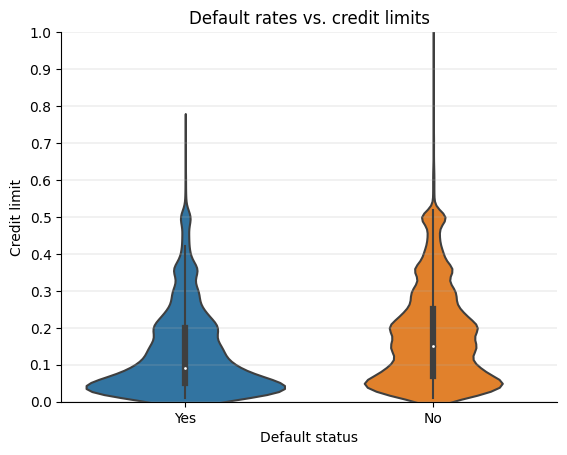

In [6]:
sns.violinplot(x='Default_Status', y='Credit_Limit', data=df)
plt.title('Default rates vs. credit limits')
plt.xlabel('Default status')
plt.grid(axis = "y", linewidth  = 0.25)
plt.yticks([i*100000 for i in range(16)], [f"{i*0.1:.1f}" for i in range(16)])
plt.ylabel('Credit limit')
plt.ylim(0, 1000000)
sns.despine()

Joe analyizes the graph and notes the following:
- Distrubtion of credit limits is similar for both customers who defaulted and customers who did not default
- Both densities peak around 0.05 indicating it is the most common credit limit (50000)

He then comes to the shocking revelation that: <br>
- customers with **lower credit limits are more likely to default on their credit card paymements** as the density of credit limits around 0.05 is higher for customers who defaulted vs those who didnt.

Still, Joe is a smart guy and he understands that correlation is not equal to causation. He needs to do more research. He thinks if certain demographic variables play a role in higher default rates. So he graphs the following comparisons
- Default rates vs gender
- Credit limit vs age with the addition of default status
- Default rates vs education level

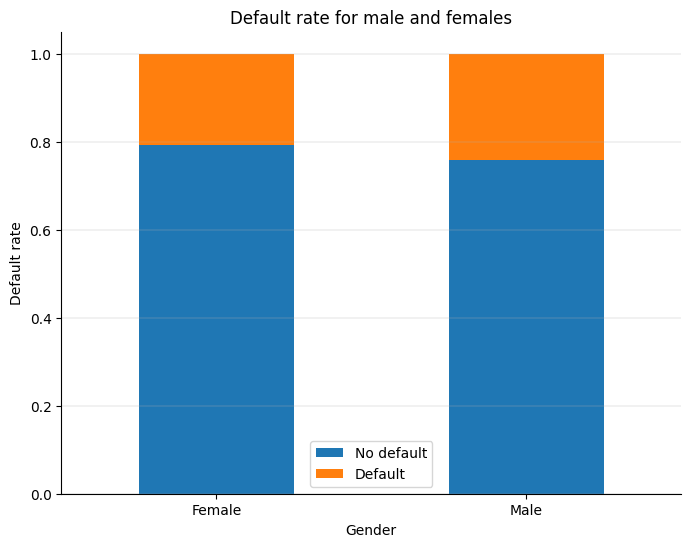

In [7]:
default_rates = df.groupby(['Sex', 'Default_Status'])['Sex'].count().unstack()
default_rates = default_rates.apply(lambda x: x / x.sum(), axis=1)
ax = default_rates.plot(kind='bar', stacked=True, figsize=(8, 6))
ax.set_xticklabels(['Female', 'Male'], rotation=0)
plt.grid(axis = "y", linewidth  = 0.25)
ax.set_xlabel('Gender')
plt.title("Default rate for male and females")
ax.set_ylabel('Default rate')
ax.legend(['No default', 'Default'])
sns.despine()

There is little difference in the default rates between both genders, indicating gender has little to no affect on default rates

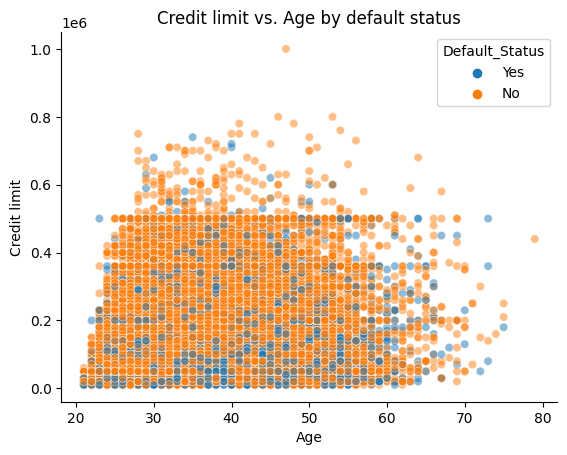

In [7]:
sns.scatterplot(x='Age', y='Credit_Limit', hue='Default_Status', data=df, alpha=0.5)
plt.title('Credit limit vs. Age by default status')
plt.xlabel('Age')
plt.ylabel('Credit limit')
sns.despine()

There is no clear relationship between age and default rates. 

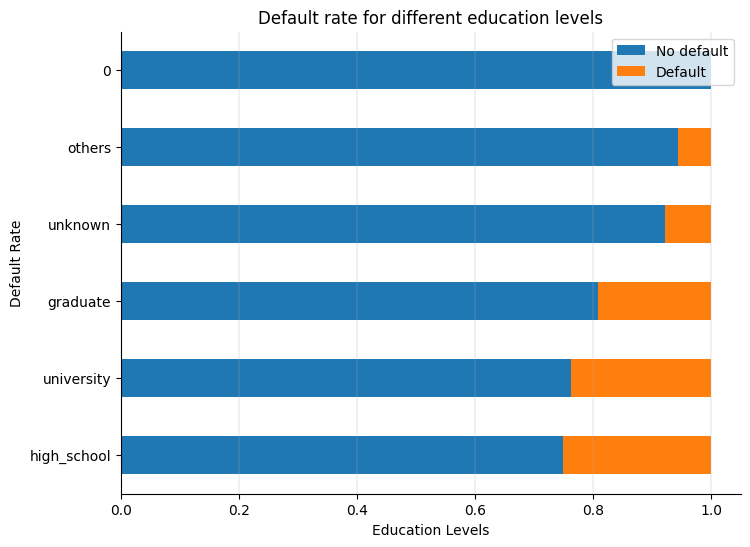

In [ ]:
default_rates = df.groupby(['Education_Level', 'Default_Status'])['Education_Level'].count().unstack()
default_rates = default_rates.apply(lambda x: x / x.sum(), axis=1)
default_rates = default_rates.sort_values(by="Yes", ascending=False)
ax = default_rates.plot(kind='barh', stacked=True, figsize=(8, 6))
plt.grid(axis = "x", linewidth  = 0.25)
ax.set_xlabel('Default Rate')
plt.title("Default rate for different education levels")
ax.set_ylabel('Education Levels')
ax.legend(['No default', 'Default'])
sns.despine()

Joe analyizes the graph and notes the following:
- With an increase in education level default rates tend to decrease
- Both others and the unknown(s) columns appear to have the lowest levels of default rates

### Conclusion
Joe reaches a conclusion that customers with **lower levels of education likely are less educated regarding how to manage their finances leading to higher rates of default**. 

Joe is aware that more analysis is required to justify this conclusion, but given the data he has, this is the most accurate conclusion he can draw